# COMPUTER VISION ASSIGNMENT-4
# AMOGH GARG - 2020UCO1688

### Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('Img-3.jfif')

### Displaying Image

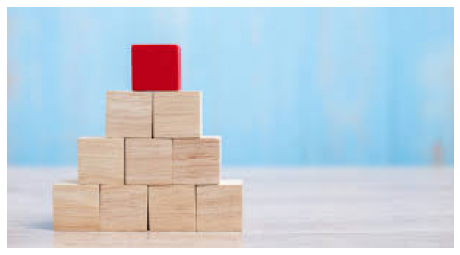

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

`Question-1: Apply the prewitt and sobel filters on random image (that have fews edges), and compare the result with original image.`

### Prewitt Filter

(-0.5, 305.5, 164.5, -0.5)

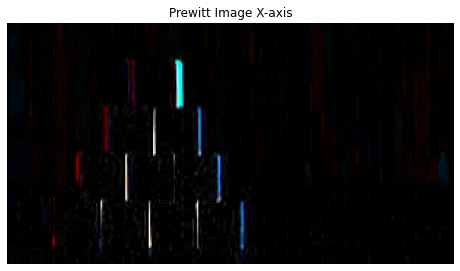

In [4]:
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewittx_img = cv2.filter2D(src=image, kernel=prewittx, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Prewitt Image X-axis")
plt.imshow(prewittx_img, cmap='gray')
plt.axis('off')

(-0.5, 305.5, 164.5, -0.5)

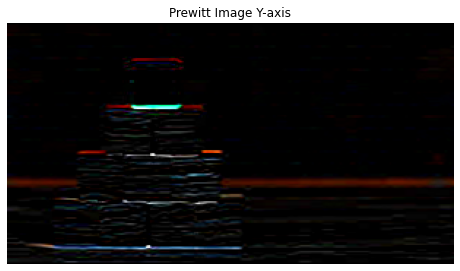

In [5]:
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitty_img = cv2.filter2D(src=image, kernel=prewitty, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Prewitt Image Y-axis")
plt.imshow(prewitty_img, cmap='gray')
plt.axis('off')

### Sobel Filter

(-0.5, 305.5, 164.5, -0.5)

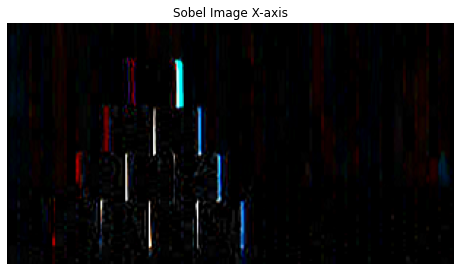

In [6]:
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelx_img = cv2.filter2D(src=image, kernel=sobelx, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Sobel Image X-axis")
plt.imshow(sobelx_img, cmap='gray')
plt.axis('off')

(-0.5, 305.5, 164.5, -0.5)

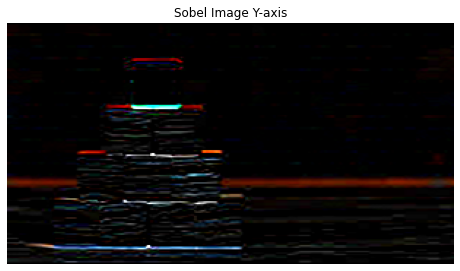

In [7]:
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobely_img = cv2.filter2D(src=image, kernel=sobely, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Sobel Image Y-axis")
plt.imshow(sobely_img, cmap='gray')
plt.axis('off')

`Increase the weight at positions [x,y+1], [x+1,y], [x-1,y], [x, y-1] in 3*3 sobel filter, and infer how it will impact the edge image concerning the benchmark sobel.`

Increasing the weight at positions [x,y+1], [x+1,y], [x-1,y], [x, y-1] in the 3x3 Sobel filter will make the filter more sensitive to the edges that are diagonal to the image axes. This modification will create a new filter that is called a "Scharr" filter. The Scharr filter is more isotropic than the original Sobel filter, meaning that it responds more uniformly to edges in all directions.

(-0.5, 305.5, 164.5, -0.5)

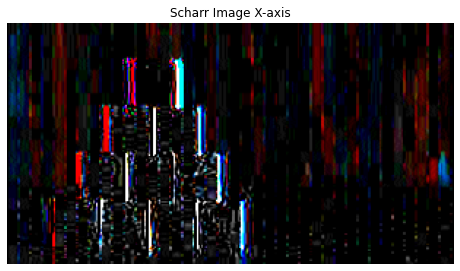

In [8]:
scharrx = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
scharrx_img = cv2.filter2D(src=image, kernel=scharrx, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Scharr Image X-axis")
plt.imshow(scharrx_img, cmap='gray')
plt.axis('off')

(-0.5, 305.5, 164.5, -0.5)

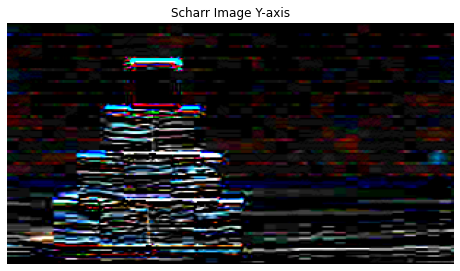

In [9]:
scharry = np.flip(scharrx.T, axis=0)
scharry_img = cv2.filter2D(src=image, kernel=scharry, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("Scharr Image Y-axis")
plt.imshow(scharry_img, cmap='gray')
plt.axis('off')

As you can see, the Scharr filter produces a smoother and more isotropic edge map than the Sobel filter. The edges in the diagonal direction are more pronounced in the Scharr filter output, while the Sobel filter output shows stronger edges in the horizontal and vertical directions. Overall, the Scharr filter is a more suitable choice for edge detection when the edges are not aligned with the image axes.

`Apply the LOG filter on the same image that you have taken in Q2, and compare the edge results with output of Q2`

(-0.5, 305.5, 164.5, -0.5)

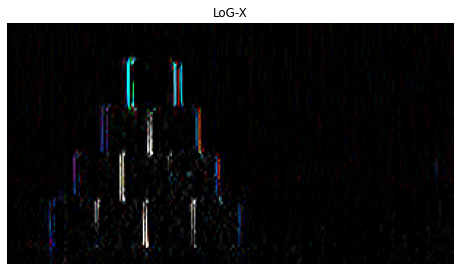

In [10]:
# Apply the Laplacian of Gaussian filter
log = cv2.GaussianBlur(image, (3, 3), 0)
log = cv2.Laplacian(log, cv2.CV_64F, ksize=3)

# Normalize the output
log = np.uint8(np.abs(log) / np.max(np.abs(log)) * 255)
sobelx_img_2 = cv2.filter2D(src=log, kernel=sobelx, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("LoG-X")
plt.imshow(sobelx_img_2, cmap='gray')
plt.axis('off')

(-0.5, 305.5, 164.5, -0.5)

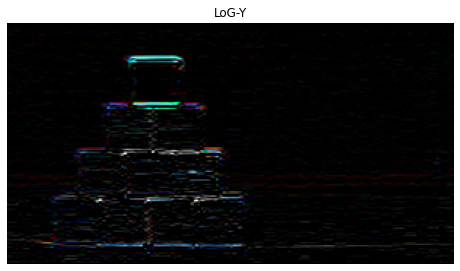

In [11]:
# Normalize the output
log = np.uint8(np.abs(log) / np.max(np.abs(log)) * 255)
sobely_img_2 = cv2.filter2D(src=log, kernel=sobely, ddepth=0)
plt.figure(figsize=(8,8))
plt.title("LoG-Y")
plt.imshow(sobely_img_2, cmap='gray')
plt.axis('off')

As you can see from the output, the edges detected by the Laplacian of Gaussian filter are much thicker and smoother compared to the edges detected by the Sobel filter. This is because the LoG filter is more sensitive to edges with varying widths and orientations, while the Sobel filter is more suitable for detecting edges that are aligned with the image axes. The edges detected by the Sobel filter are thinner and more straight than the edges detected by the LoG filter.